# 텍스트 마이닝 06 - 뉴스 텍스트 Word Cloud

<img width="40%" src="https://i.imgur.com/AydcsdT.png">
    
### 2017 FinanceData.KR http://financedata.kr

# 경제 뉴스 클라우드
* feedparser, newspaper, konlpy 등 다양한 파이썬 라이브러를 활용
* 뉴스 텍스트 데이터 수집, 전처리, 형태소 분석(명사추출), 출현 회수 카운트, 클라우드로 시각화까지 진행
* (import를 제외하면) 약 20라인 정도의 코드 

<img src="https://i.imgur.com/jd1VoSE.png" >

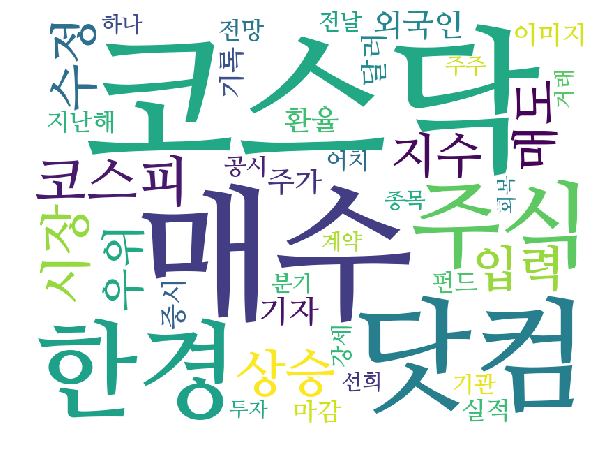

In [1]:
%matplotlib inline
import feedparser
import newspaper
from konlpy.tag import Mecab
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def draw_wordcloud_from_rss(rss_link):
    #  feedparser, newspaper: RSS를 통해 뉴스의 본문을 수집
    feeds = feedparser.parse(rss_link)
    links = [entry['link'] for entry in feeds['entries']]

    news_text =''
    for link in links:
        article = newspaper.Article(link, language='ko')
        article.download()
        article.parse()
        news_text += article.text

    # konlpy, Mecab: 형태소 분석을 통해 본문에서 명사추출, 1글자는 단어는 삭제
    engine = Mecab() 
    nouns = engine.nouns(news_text)
    nouns = [n for n in nouns if len(n) > 1]

    # Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 40개
    count = Counter(nouns)
    tags = count.most_common(40)

    # WordCloud, matplotlib: 단어 구름 그리기
    font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
    wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    
# 한국경제 뉴스 (주식) RSS
rss_link = 'http://rss.hankyung.com/new/news_stock.xml'
draw_wordcloud_from_rss(rss_link)

# 한글 폰트 설치 

```bash
# 나눔폰트 - nanum
$ sudo apt-get install fonts-nanum fonts-nanum-coding fonts-nanum-extra
... 중략 ...

$ ls /usr/share/fonts/truetype/nanum/
NanumBarunGothic.ttf NanumBrush.ttf NanumGothicBold.ttf NanumGothicLight.ttf NanumGothic_Coding_Bold.ttf NanumMyeongjoBold.ttf NanumPen.ttf  NanumBarunGothicBold.ttf NanumGothic.ttf NanumGothicExtraBold.ttf NanumGothic_Coding.ttf NanumMyeongjo.ttf NanumMyeongjoExtraBold.ttf

# (선택적) 은폰트 - unfonts
$ sudo apt-get install fonts-unfonts-core fonts-unfonts-extra 

# (선택적) 백묵폰트 - baekmuk
$ sudo apt-get install fonts-baekmuk
```

# 1) feedparser: 뉴스 링크 수집
* feedparser: RSS feed 파싱 라이브러리
* 경향신문 경제뉴스 RSS를 통해 경제 뉴스 링크 수집(30개)

In [2]:
import feedparser

# 한국경제 뉴스 (주식) RSS
feeds = feedparser.parse('http://rss.hankyung.com/new/news_stock.xml')
links = [entry['link'] for entry in feeds['entries']]
links

['http://www.hankyung.com/news/app/newsview.php?aid=2018010618936&sid=newsStock&nid=000&rss=r',
 'http://www.hankyung.com/news/app/newsview.php?aid=2018010599156&sid=newsStock&nid=000&rss=r',
 'http://www.hankyung.com/news/app/newsview.php?aid=2018010598766&sid=newsStock&nid=000&rss=r',
 'http://www.hankyung.com/news/app/newsview.php?aid=2018010597536&sid=newsStock&nid=000&rss=r',
 'http://www.hankyung.com/news/app/newsview.php?aid=2018010597876&sid=newsStock&nid=000&rss=r',
 'http://www.hankyung.com/news/app/newsview.php?aid=2018010597286&sid=newsStock&nid=000&rss=r',
 'http://www.hankyung.com/news/app/newsview.php?aid=2018010597276&sid=newsStock&nid=000&rss=r',
 'http://www.hankyung.com/news/app/newsview.php?aid=2018010597206&sid=newsStock&nid=000&rss=r',
 'http://www.hankyung.com/news/app/newsview.php?aid=2018010597136&sid=newsStock&nid=000&rss=r',
 'http://www.hankyung.com/news/app/newsview.php?aid=2018010596966&sid=newsStock&nid=000&rss=r',
 'http://www.hankyung.com/news/app/newsv

 # 2) newspaper: 뉴스 본분 수집
* newspaper: HTML문서에서 제목, 본문 등을 자동 식별하여 텍스트를 추출하는 라이브러리
* 본문(article.text)를 모두 news_text에 누적하여 저장

In [3]:
import newspaper

news_text =''
for link in links:
    article = newspaper.Article(link, language='ko')
    article.download()
    article.parse()
    news_text += article.text

news_text[:1000]

'오정민의 주간 전망 실적 시즌 개막…코스닥 정책 효과 기대\n\n입력 2018-01-07 08:00:21 | 수정 2018-01-07 10:46:39\n\n기사 이미지 보기 사진=게티이미지뱅크\n\n기사 이미지 보기 자료=케이프투자증권 제공\n\n증시 전문가들은 이번주(8~12일) 국내 증시에서 코스닥지수가 코스피지수보다 양호한 수익률을 거둘 가능성이 높다고 7일 전망했다. 코스닥지수가 10년여 만에 820선에 안착한 가운데 추가 상승을 시도할 것이란 관측이다.우선 금융당국이 코스닥 시장 활성화 대책 발표를 앞두고 있다는 점이 추가 상승을 기대하게 만드는 요인이다. 금융위원회는 오는 11일 \'코스닥시장 중심의 자본시장 혁신방안\'을 내놓을 계획이다. 방안에는 코스닥 시장에 대한 연기금 투자 확대, 전용 펀드 세제 혜택 부여 등의 내용이 담긴 것으로 전해졌다.이와 함께 8일(현지시간) 시작하는 JP모건 헬스케어 콘퍼런스, 9일 개막하는 세계 최대 전자쇼 \'CES 2018\' 등 이벤트가 모두 코스닥 투자심리 개선 요인이란 분석이다.김병연 NH투자증권 연구원은 "코스닥 전용 펀드 세제 혜택의 강도에 따라 \'단기 차익실현 욕구 확대\' 혹은 \'추가적인 수급 모멘텀 확대\' 여부가 결정 될 것"이라면서도 "2월 중소벤처기업 협업 활성화 대책 발표, 1~2월 4차 산업혁명 관련 부처 업무보고 등 이벤트에 비춰 코스닥 및 중소형주 모멘텀이 꾸준히 확대될 것"이라고 예상했다.김예은 IBK투자증권 연구원 역시 "코스닥은 중소형주가 연초에 양호한 수익률을 나타내는 \'1월 효과\'와 정부 정책에 따른 부가적인 효과가 기대된다"며 "강한 상승 동력을 얻을 것"이라고 내다봤다.유가증권시장의 경우 오는 8일 LG전자 와 9일 삼성전자 의 지난해 4분기 잠정 실적 발표를 기점으로 실적 시즌이 시작된다.최근 원화 강세 여파 우려로 주도주인 정보기술(IT)주가 지지부진한 흐름을 보인 만큼 실적과 증시 반응을 통해 향후 주가 향배를 가늠할 수 있을 전망이다.박춘영 대신증권 연구원

In [4]:
len(news_text)

9625

# 3) KoNLpy + Mecab: 형태소 분석
* 형태소 분석기로 명사만 추출
* 1글자는 의미가 없다고 보고 삭제

In [5]:
from konlpy.tag import Mecab

engine = Mecab() 
nouns = engine.nouns(news_text)

In [6]:
len(nouns)

1778

In [7]:
nouns = [n for n in nouns if len(n) > 1]
len(nouns)

1400

# 4) Counter: 단어 개수를 세기
* 단어의 개수를 세고,
* 가장 많이 등장한 N개 구하기 (Counter.most_common())

In [8]:
from collections import Counter

count = Counter(nouns)
tags = count.most_common(40)
tags[:20]

[('코스닥', 33),
 ('매수', 27),
 ('닷컴', 25),
 ('한경', 25),
 ('주식', 24),
 ('코스피', 24),
 ('시장', 23),
 ('상승', 22),
 ('입력', 20),
 ('수정', 20),
 ('지수', 19),
 ('매도', 19),
 ('외국인', 17),
 ('우위', 17),
 ('기자', 16),
 ('달러', 13),
 ('환율', 13),
 ('주가', 13),
 ('증시', 12),
 ('기록', 12)]

# 5) WordCloud, matplotlib: 단어 구름 그리기
* WordCloud 로 워드 클라이우드 이미지 생성

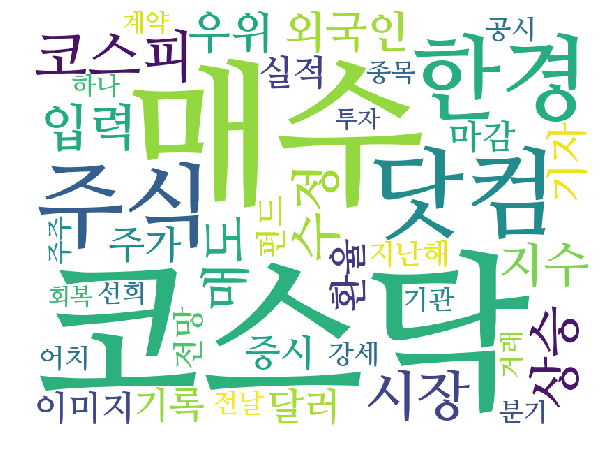

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

# 분야별 RSS 워드 클라우드

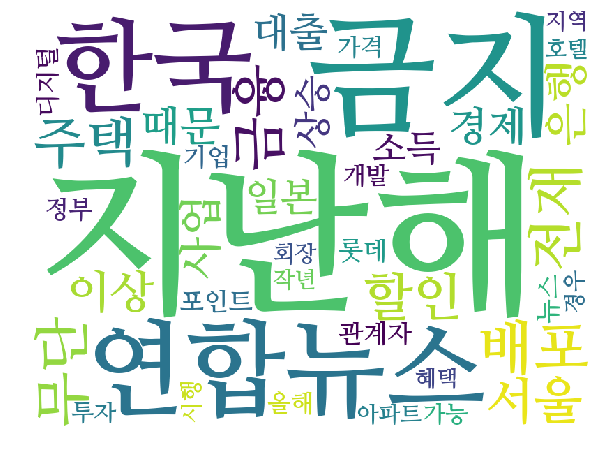

In [14]:
# 매일경제 헤드라인
draw_wordcloud_from_rss('http://file.mk.co.kr/news/rss/rss_30000001.xml')

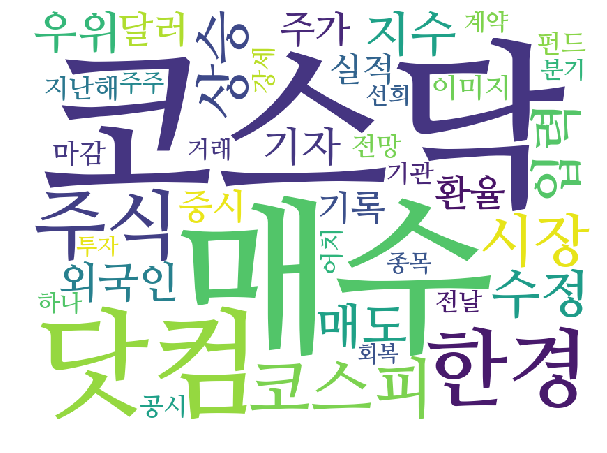

In [13]:
# 한국경제신문 부동산
draw_wordcloud_from_rss('http://rss.hankyung.com/new/news_estate.xml')

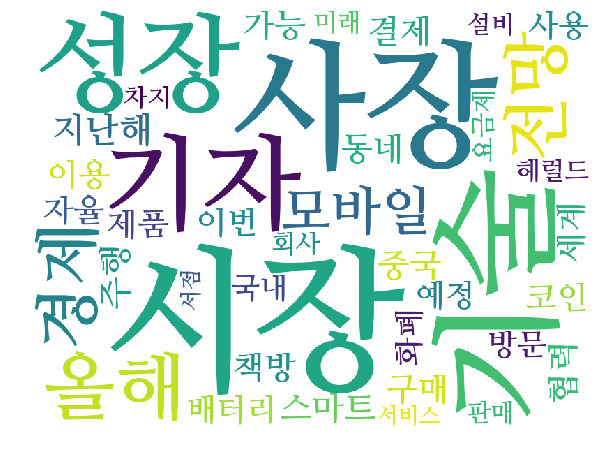

In [15]:
# 헤럴드 경제 기업
draw_wordcloud_from_rss('http://biz.heraldm.com/rss/010107000000.xml')

# Summary
* 경제 뉴스 클라우드
* 한글 폰트 설치
* 1) feedparser: 뉴스 링크 수집
* 2) newspaper: 뉴스 본분 수집
* 3) KoNLpy + Mecab: 형태소 분석
* 4) Counter: 단어 개수를 세기, TOP N 구하기 Counter.most_common()
* 5) WordCloud, matplotlib: 단어 구름 그리기


### 2017 http://financedata/kr